# Week4 - Homework 2

- Execute the below code, then answer the numbered questions.
- You can create additinal code and markdown blocks

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/car-reg-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           8164 non-null   object 
 1   transmission   8106 non-null   object 
 2   state          8152 non-null   object 
 3   condition      8173 non-null   float64
 4   odometer       8178 non-null   float64
 5   auction_value  8107 non-null   float64
 6   selling_price  9055 non-null   float64
dtypes: float64(4), object(3)
memory usage: 495.3+ KB


## Question 1:
### Which features can we use?

## Feature Selection Analysis and explanation
1. make (Categorical, 8164/9055 non-null) → Can be used if missing values are handled (use imputation or categorical encoding).
2. transmission (Categorical, 8106/9055 non-null) → Can be used with imputation/encoding.
3. state (Categorical, 8152/9055 non-null) → Can be used if missing values are handled.
4. condition (Numerical, 8173/9055 non-null) → Important for pricing, needs imputation.
5. odometer (Numerical, 8178/9055 non-null) → Highly relevant for selling price, needs imputation.
6. auction_value (Numerical, 8107/9055 non-null) → Directly related to selling price, useful if missing values are handled.
7. selling_price (Target, 9055/9055 non-null) → This is the target variable and should not be used as a feature.

Therefore, usable features are make, transmission, state, condition, odometer, auction_value, but all of them require handling missing values.

In [5]:
from sklearn.model_selection import train_test_split
features = [
    "make", "transmission", "state", "condition", "odometer", "auction_value"
]

X = df[features]
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 7,244
Records in test data: 1,811

Features:
make
transmission
state
condition
odometer
auction_value


## Question 2: 
Split the features into two lists, one for the numerical features and another for the categorical features.

In [8]:
# insert code here
# Define numerical and categorical feature lists
numerical_features = ["condition", "odometer", "auction_value"]
categorical_features = ["make", "transmission", "state"]

# Print the feature lists
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['condition', 'odometer', 'auction_value']
Categorical Features: ['make', 'transmission', 'state']


## Question 3: 
 Using the numerical variables, create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

In [10]:
# insert code here
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Create a pipeline for numerical features
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # Replace missing values with median
    ("scaler", StandardScaler())  # Standardize the values
])

# Apply the pipeline to the numerical features
df_numerical_transformed = numerical_pipeline.fit_transform(df[numerical_features])

# Convert the transformed array back into a DataFrame
df_numerical_transformed = pd.DataFrame(df_numerical_transformed, columns=numerical_features)

# Display the transformed data
print(df_numerical_transformed.head())


   condition  odometer  auction_value
0   1.333059 -0.185336      -0.191185
1  -0.081007 -0.410985       0.249020
2  -0.723764 -0.314109       0.452192
3   0.176096 -0.362234      -0.516260
4  -1.237969 -0.406528       1.657678


## Question 4: 
Using the categorical variables, create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.
- You should be dropping one category from each variable when using the one-hot encoder.  
- To ensure the pipeline doesn't break when it receives new/unexpected categories, you should ignore new categories.
- Use a fit transformer on the training dataset to validate all the columns are now numeric and to determine how many columns the transformed data contains.

In [20]:
# insert code here
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

# Create a column transformer for the categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent category
            ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))  # One-hot encoding with drop and handle unknown categories
        ]), categorical_features)
    ])

# Apply the transformer to the training data
X_train_categorical_transformed = preprocessor.fit_transform(X_train)

# Convert the transformed array back into a DataFrame
# Get the column names from the OneHotEncoder
one_hot_columns = preprocessor.transformers_[0][1].named_steps['onehot'].get_feature_names_out(categorical_features)

# Convert the sparse matrix to a dense matrix before creating the DataFrame
X_train_categorical_transformed_df = pd.DataFrame(X_train_categorical_transformed.toarray(), columns=one_hot_columns)

# Check if the columns are numeric
print("Transformed Data Columns:")
print(X_train_categorical_transformed_df.head())

# Check how many columns the transformed data contains
print("Number of columns after transformation:", X_train_categorical_transformed_df.shape[1])

# Verify all columns are numeric
print("Are all columns numeric? ", X_train_categorical_transformed_df.dtypes.isin([float, int]).all())

Transformed Data Columns:
   make_chevrolet  make_chrysler  make_dodge  make_ford  make_honda  \
0             0.0            0.0         0.0        0.0         1.0   
1             0.0            0.0         0.0        0.0         1.0   
2             0.0            0.0         0.0        0.0         0.0   
3             0.0            0.0         1.0        0.0         0.0   
4             1.0            0.0         0.0        0.0         0.0   

   make_hyundai  make_kia  make_nissan  make_toyota  transmission_manual  ...  \
0           0.0       0.0          0.0          0.0                  0.0  ...   
1           0.0       0.0          0.0          0.0                  0.0  ...   
2           0.0       0.0          0.0          0.0                  0.0  ...   
3           0.0       0.0          0.0          0.0                  0.0  ...   
4           0.0       0.0          0.0          0.0                  0.0  ...   

   state_or  state_pa  state_pr  state_sc  state_tn  state_t

## Question 5: 

Combine the numerical and categorical pipelines into one data processing pipeline.
- Use a fit transformers and the training dataset to verify the data has no missing values and the correct number of columns.

In [52]:
# insert code here
# Define the numerical pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  
    ('scaler', StandardScaler())  
])

# Define the categorical pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent category
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))  # One-hot encoding with drop and handle unknown categories
])

# Create the column transformer to apply the pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    sparse_threshold=0  # Forces a dense NumPy array output, preventing shape mismatch errors
)

# Apply the transformations to the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Convert the transformed data into a DataFrame
# Get column names for numerical features
numerical_column_names = numerical_features
# Get column names for categorical features
categorical_column_names = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine the column names
all_column_names = numerical_column_names + list(categorical_column_names)

# Convert the processed data into a DataFrame with the correct column names
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_column_names)

# Verify the data
print("Transformed Data Columns:")
print(X_train_processed_df.head())

# Check how many columns the transformed data contains
print("Number of columns after transformation:", X_train_processed_df.shape[1])

# Verify no missing values in the processed data
print("Are there any missing values in the transformed data?", X_train_processed_df.isnull().sum().sum() == 0)

Transformed Data Columns:
   condition  odometer  auction_value  make_chevrolet  make_chrysler  \
0   0.824748 -0.091198      -0.238347             0.0            0.0   
1   0.178118 -0.492670      -0.292085             0.0            0.0   
2   0.695422 -0.484361       1.091679             0.0            0.0   
3   0.178118 -0.785464      -0.540626             0.0            0.0   
4   0.824748  0.363462      -0.792525             1.0            0.0   

   make_dodge  make_ford  make_honda  make_hyundai  make_kia  ...  state_or  \
0         0.0        0.0         1.0           0.0       0.0  ...       0.0   
1         0.0        0.0         1.0           0.0       0.0  ...       0.0   
2         0.0        0.0         0.0           0.0       0.0  ...       0.0   
3         1.0        0.0         0.0           0.0       0.0  ...       0.0   
4         0.0        0.0         0.0           0.0       0.0  ...       0.0   

   state_pa  state_pr  state_sc  state_tn  state_tx  state_ut  sta

## Question 6: 

Add a linear regression model to the pipeline.
- Report what the $R^2$ is using the `test` data.  

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Add Linear Regression model to the pipeline
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Use the preprocessor created earlier
    ('regressor', LinearRegression())  # Linear Regression model
])

# Train the model using the training data
full_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = full_pipeline.predict(X_test)

# Calculate R² score on test data
r2 = r2_score(y_test, y_pred)

print(f"R² Score on Test Data: {r2:.4f}")


R² Score on Test Data: -0.0145


## Question 7: 

Create a plot(s) of the residuals. Do you have any concerns about patterns in the residuals that the model is neglecting to pick-up?
- Include a sentence or two on what you observe.

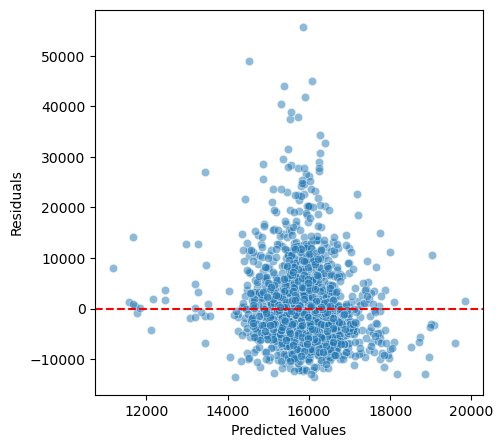

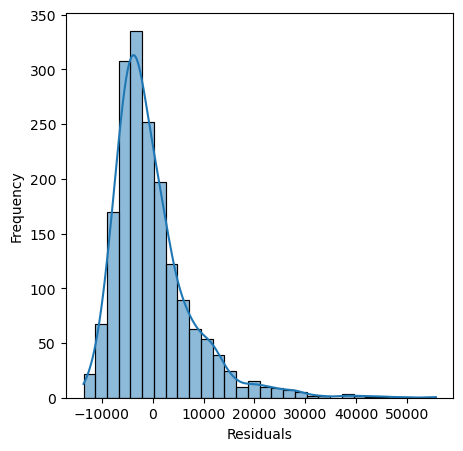

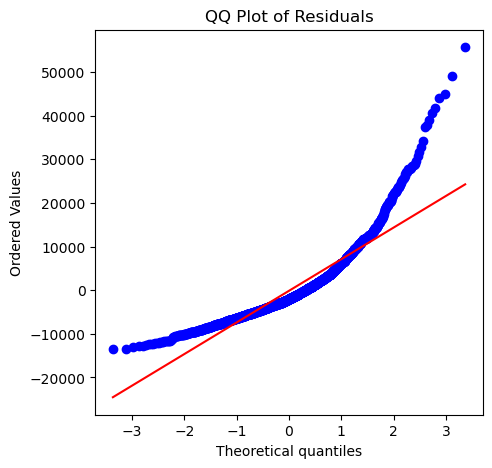

In [62]:
# insert code here
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.metrics import r2_score

# Compute residuals
y_pred = full_pipeline.predict(X_test)
residuals = y_test - y_pred

# Plot Residuals vs. Predicted Values
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Histogram of Residuals
plt.figure(figsize=(5, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# QQ Plot
plt.figure(figsize=(5, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()



There is a funnel-shape, not random in residue scatter plot and a right-skewed distribution in Histogram of Residuals, which indicates the model might not capture all the variance.

## Question 8: 

Modify the pipeline to use a ridge regression model with an alpha value of 100. How does this change the $R^2$?

In [73]:
from sklearn.linear_model import Ridge

# Modify the pipeline to use Ridge Regression with alpha=100
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('model', Ridge(alpha=100))  # Ridge regression with alpha=100
])

# Train the Ridge regression model
ridge_pipeline.fit(X_train, y_train)

# Evaluate on the test data
r2_ridge = ridge_pipeline.score(X_test, y_test)

print(f"R² Score on Test Data (Ridge, alpha=100): {r2_ridge:.4f}")


R² Score on Test Data (Ridge, alpha=100): -0.0072


R² Score increases a little bit, but still not satisfatory.